# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(19680801)


## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
df = pd.DataFrame(app_train['AMT_INCOME_TOTAL'], columns = ['AMT_INCOME_TOTAL'])
df.head()

,AMT_INCOME_TOTAL
0,202500.0
1,270000.0
2,67500.0
3,135000.0
4,121500.0


In [5]:
mu = int(df.mean())
mu

168797

In [6]:
sigma = int(df.std())
sigma

237123

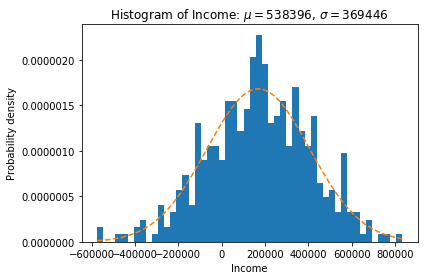

In [7]:
np.random.seed(19680801)

x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins, density=1)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Income')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Income: $\mu=538396$, $\sigma=369446$')

fig.tight_layout()
plt.show()